In [63]:
import numpy as np              # For numerical operations and array manipulations
import pandas as pd            # For data manipulation and analysis
import matplotlib.pyplot as plt  # Basic plotting library
import seaborn as sns           # Statistical data visualization
import math
%matplotlib inline

## Generate a 1d function and its gradient

In [7]:
def func(x):
    return 2 * np.sin(x) - 3 * np.cos(x) + 5/2 * np.cos(2*x) - 1/3 * np.sin(2*x)

def grad(x):
    return 2 * np.cos(x) + 3 * np.sin(x) - 5 * np.sin(2*x) - 2/3 * np.cos(2*x)

In [5]:
def plot_function(func, x_start=-np.pi, x_end=np.pi, num_points=1000):
    # Generate x values
    x = np.linspace(x_start, x_end, num_points)
    
    # Calculate corresponding y values
    y = func(x)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='f(x)', color='blue')
    
    # Add grid
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Add title and labels
    plt.title('Plot of f(x)')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    
    # Add vertical and horizontal lines for axes
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # Add legend
    plt.legend()
    
    # Show the plot
    plt.show()

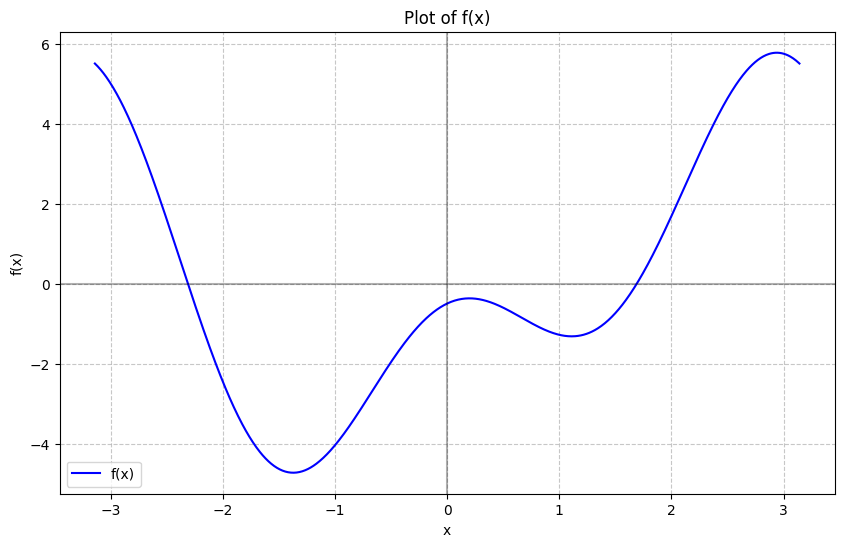

In [8]:
plot_function(func)

## Next implement all SGD algorithms

In [18]:
# Visualise the plot
def visualize_gradient_descent(func, gd_x, gd_y, x_start=-np.pi, x_end=np.pi, num_points=1000):
    """
    Visualize function and gradient descent steps
    """
    # Create points for plotting the function
    x = np.linspace(x_start, x_end, num_points)
    y = func(x)

    # Create the plot
    plt.figure(figsize=(12, 8))

    # Plot the original function
    plt.plot(x, y, 'b-', label='f(x)', alpha=0.5)

    # Plot gradient descent points and connections
    plt.plot(gd_x, gd_y, 'r--', alpha=0.3)  # Connect points with red dashed line
    plt.scatter(gd_x, gd_y, c='red', s=100, label='Gradient Descent Steps')

    # Customize the plot
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.title('Gradient Descent Optimization Path')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()

### Vanilla SGD

In [15]:
def vanillaSGD(x, func, grad, n_epoch=100, lr=0.01):
    x_updates, y_updates = [], []

    for epoch in range(n_epoch):
        x_updates.append(x)
        y_updates.append(func(x))

        # update
        x -= lr * grad(x)

    return x_updates, y_updates

In [58]:
gd_x, gd_y = vanillaSGD(-3, func, grad)

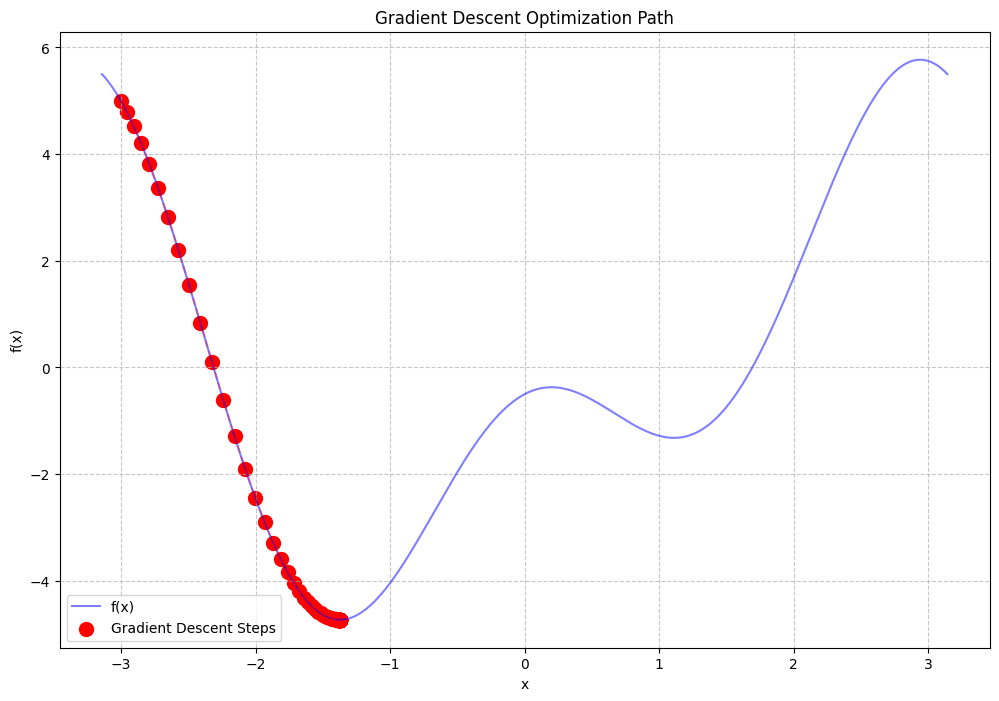

In [59]:
visualize_gradient_descent(func, gd_x, gd_y)

### SGD with momentum

In [42]:
def SGDWithMomentum(x, func, grad, n_epoch=20, lr=0.005, gamma=0.90):
    x_updates, y_updates = [], []

    v = 0.0 # initial direction

    for epoch in range(n_epoch):
        x_updates.append(x)
        y_updates.append(func(x))

        # update
        v = gamma * v + lr * grad(x)
        x -= v

    return x_updates, y_updates

In [56]:
gd_x, gd_y = SGDWithMomentum(-3, func, grad)

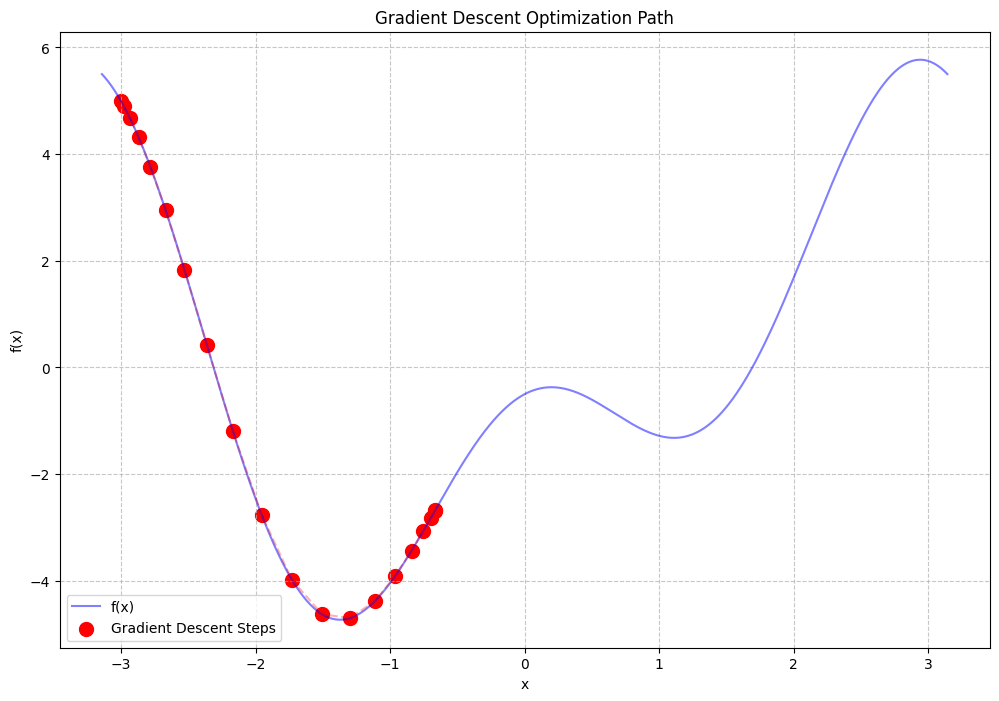

In [57]:
visualize_gradient_descent(func, gd_x, gd_y) # lower lr and much fewer epochs

### NAG

In [45]:
def NAG(x, func, grad, n_epoch=20, lr=0.005, gamma=0.90):
    x_updates, y_updates = [], []

    v = 0.0 # initial direction

    for epoch in range(n_epoch):
        x_updates.append(x)
        y_updates.append(func(x))

        # update
        v = gamma * v + lr * grad(x - gamma * v)
        x -= v

    return x_updates, y_updates

In [54]:
gd_x, gd_y = NAG(-3, func, grad)

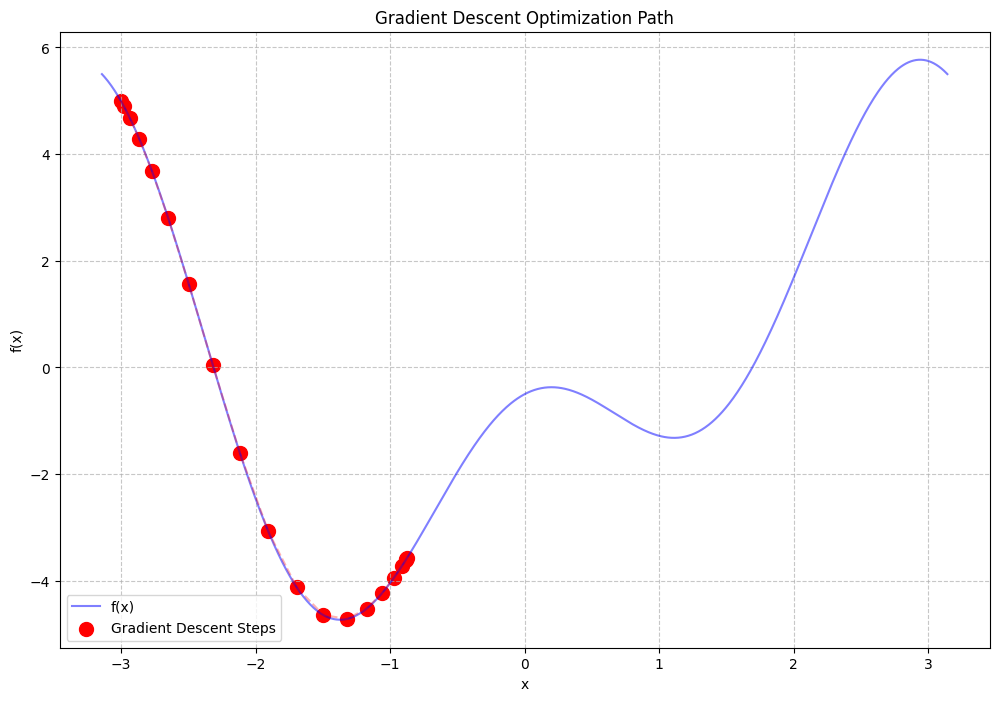

In [ ]:
visualize_gradient_descent(func, gd_x, gd_y) # similar to momentu

### AdaGrad

In [72]:
def AdaGrad(x, func, grad, n_epoch=1000, lr=0.01, epsilon=1e-8):
    x_updates, y_updates, lr_updates = [], [], []

    alpha = 0.0 # initial direction

    for epoch in range(n_epoch):
        x_updates.append(x)
        y_updates.append(func(x))

        g = grad(x)

        # update alpha
        alpha += g**2

        # update
        x -= (lr/np.sqrt(alpha + epsilon)) * g

        lr_updates.append(lr/np.sqrt(alpha + epsilon))

    return x_updates, y_updates, lr_updates

In [73]:
gd_x, gd_y, lr = AdaGrad(-3, func, grad)

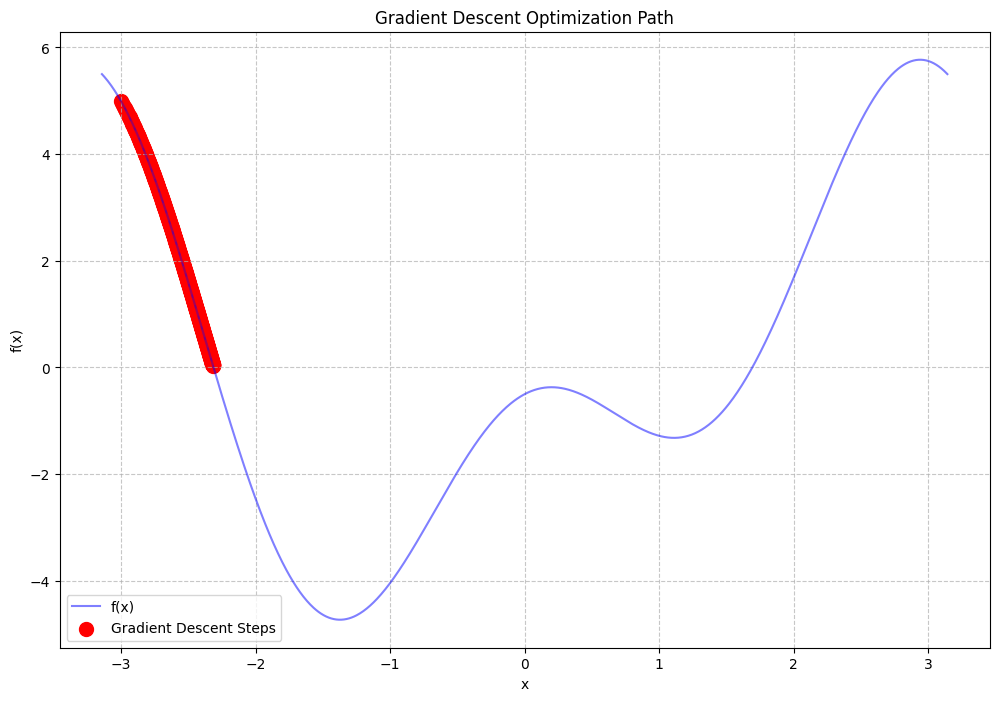

In [ ]:
visualize_gradient_descent(func, gd_x, gd_y) # very slow due to 

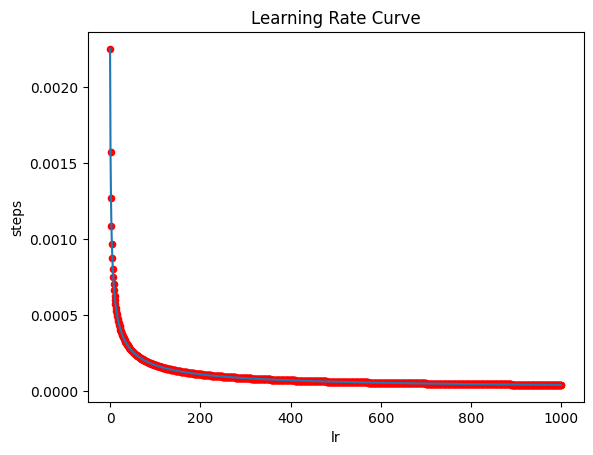

In [78]:
plt.plot(range(len(lr)), lr)  # Connect points with red dashed line
plt.scatter(range(len(lr)), lr, c='red', s=20)

plt.title('Learning Rate Curve')
plt.xlabel('lr')
plt.ylabel('steps')
plt.show()

### RMSProp

In [79]:
def RMSProp(x, func, grad, n_epoch=1000, lr=0.01, epsilon=1e-8, beta=0.90):
    x_updates, y_updates, lr_updates = [], [], []

    alpha = 0.0 # initial direction

    for epoch in range(n_epoch):
        x_updates.append(x)
        y_updates.append(func(x))

        g = grad(x)

        # update alpha
        alpha = beta * alpha + (1 - beta) * g**2

        # update
        x -= (lr/np.sqrt(alpha + epsilon)) * g

        lr_updates.append(lr/np.sqrt(alpha + epsilon))

    return x_updates, y_updates, lr_updates

In [95]:
gd_x, gd_y, lr = RMSProp(-3, func, grad)

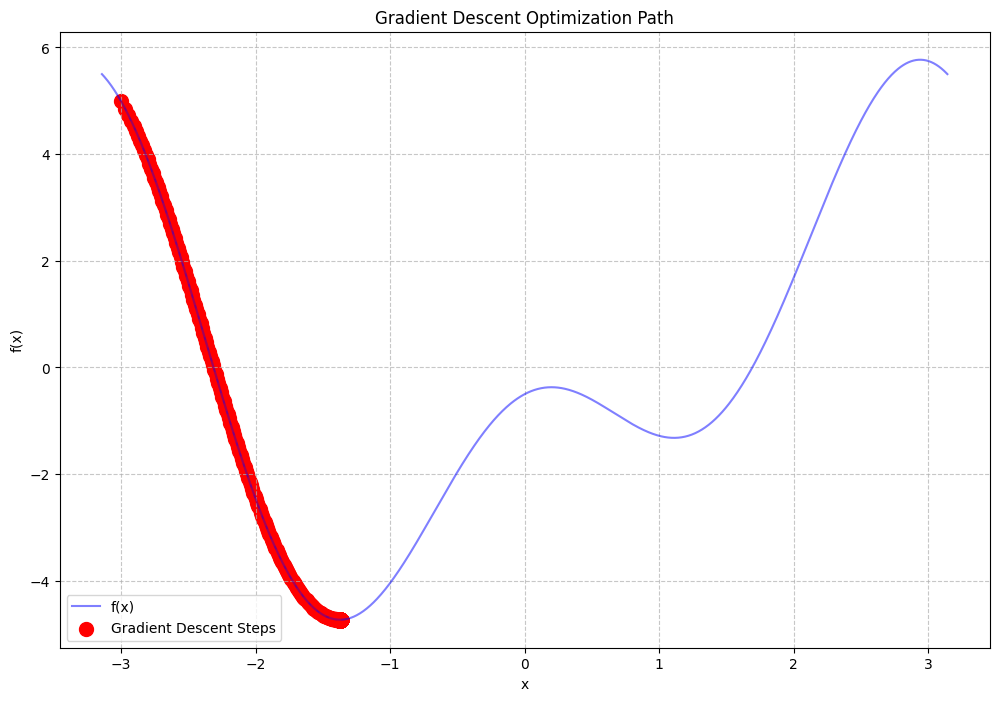

In [96]:
visualize_gradient_descent(func, gd_x, gd_y) # faster than AdaGrad

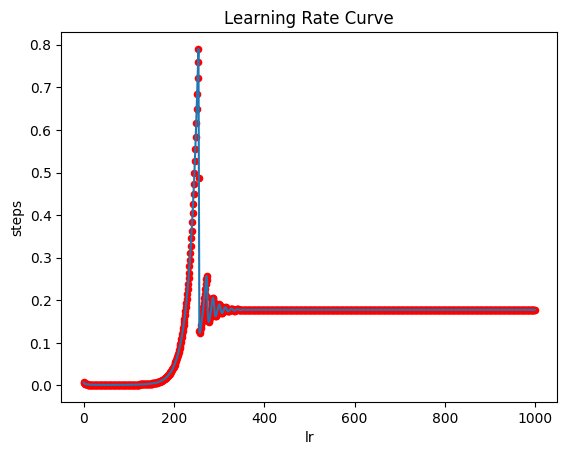

In [97]:
plt.plot(range(len(lr)), lr)  # Connect points with red dashed line
plt.scatter(range(len(lr)), lr, c='red', s=20)

plt.title('Learning Rate Curve')
plt.xlabel('lr')
plt.ylabel('steps')
plt.show()

### AdaDelta

In [90]:
def AdaDelta(x, func, grad, n_epoch=1000, epsilon=1e-8, beta=0.99):
    x_updates, y_updates, lr_updates = [], [], []

    alpha, delta_x = 0.0, 0.0 

    for epoch in range(n_epoch):
        x_updates.append(x)
        y_updates.append(func(x))

        g = grad(x)

        # update alpha
        alpha = beta * alpha + (1 - beta) * g**2

        # get delta theta
        lr = np.sqrt((delta_x + epsilon) / (alpha + epsilon))
        lr_updates.append(lr)
        delta_theta = lr * g

        # update delta_x
        delta_x = beta * delta_x + (1 - beta) * delta_theta**2

        # update
        x -= delta_theta


    return x_updates, y_updates, lr_updates

In [91]:
gd_x, gd_y, lr = AdaDelta(-3, func, grad)

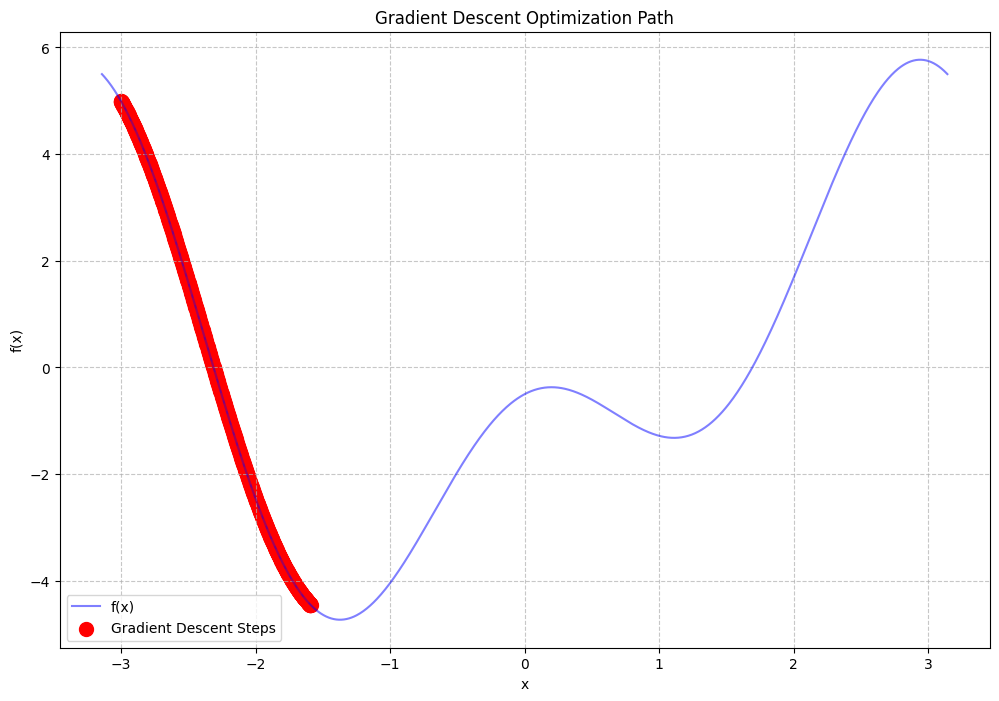

In [92]:
visualize_gradient_descent(func, gd_x, gd_y) # faster than AdaGrad

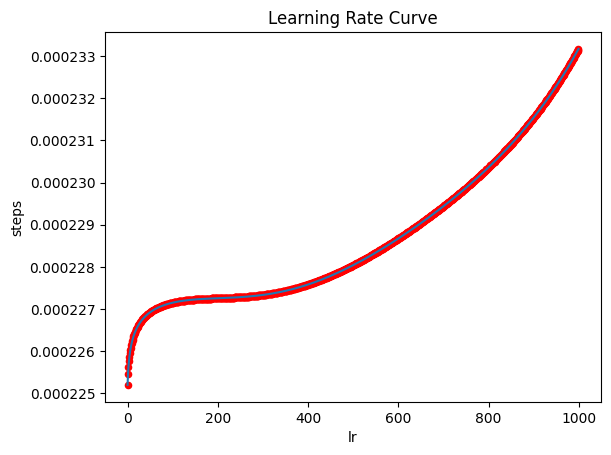

In [93]:
plt.plot(range(len(lr)), lr)  # Connect points with red dashed line
plt.scatter(range(len(lr)), lr, c='red', s=20)

plt.title('Learning Rate Curve')
plt.xlabel('lr')
plt.ylabel('steps')
plt.show()

### Adam

In [109]:
def Adam(x, func, grad, n_epoch=1000, lr=0.01, epsilon=1e-8, beta1=0.90, beta2=0.99):
    x_updates, y_updates, lr_updates = [], [], []

    m, v = 0.0, 0.0 

    for epoch in range(n_epoch):
        x_updates.append(x)
        y_updates.append(func(x))

        g = grad(x)

        # update m and v
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g**2

        # remove 0 bias
        m_hat = m / (1 - beta1 ** (epoch + 1)) # avoid the zero division
        v_hat = v / (1 - beta2 ** (epoch + 1)) # avoid the zero division

        # get delta theta
        lr_new = lr / (np.sqrt(v_hat) + epsilon)
        lr_updates.append(lr_new)
        
        # update
        x -= lr_new * m_hat


    return x_updates, y_updates, lr_updates

In [110]:
gd_x, gd_y, lr = Adam(-3, func, grad)

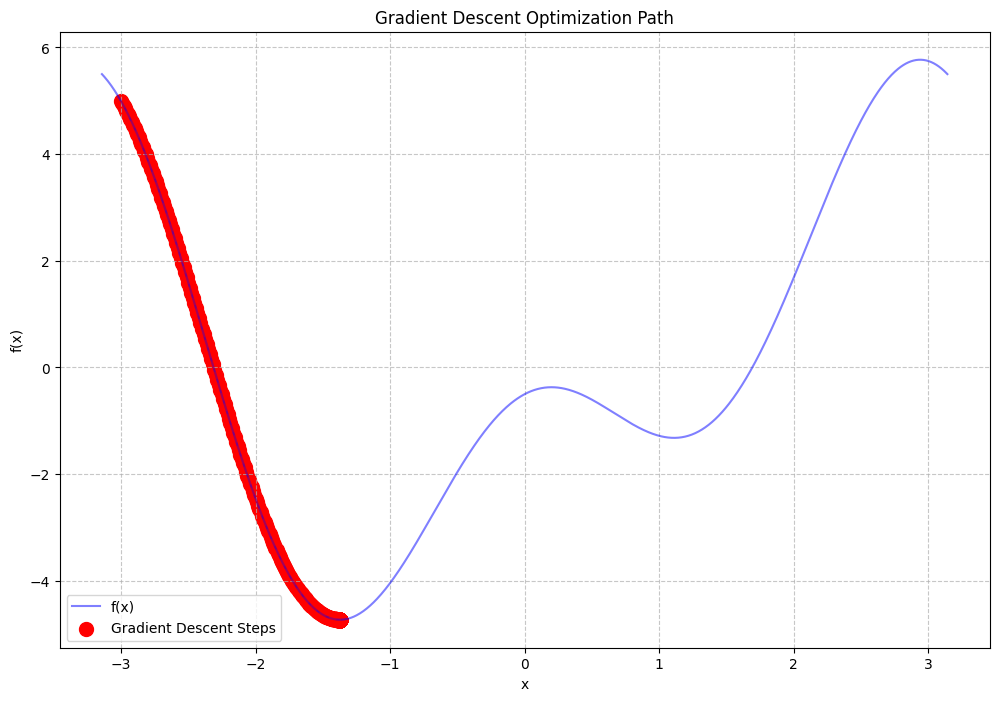

In [111]:
visualize_gradient_descent(func, gd_x, gd_y) # faster than AdaGrad

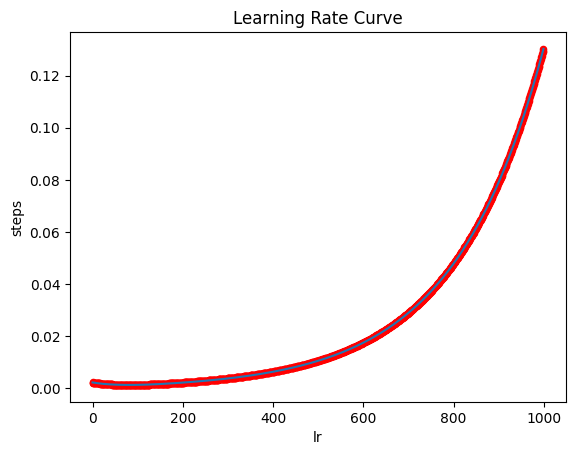

In [112]:
plt.plot(range(len(lr)), lr)  # Connect points with red dashed line
plt.scatter(range(len(lr)), lr, c='red', s=20)

plt.title('Learning Rate Curve')
plt.xlabel('lr')
plt.ylabel('steps')
plt.show()

### AdaMax

In [113]:
def AdaMax(x, func, grad, n_epoch=1000, lr=0.01, epsilon=1e-8, beta1=0.90, beta2=0.99):
    x_updates, y_updates, lr_updates = [], [], []

    m, v = 0.0, 0.0 

    for epoch in range(n_epoch):
        x_updates.append(x)
        y_updates.append(func(x))

        g = grad(x)

        # update m and v
        m = beta1 * m + (1 - beta1) * g
        v = max(beta2 * v, abs(g))

        # remove 0 bias
        m_hat = m / (1 - beta1 ** (epoch + 1)) # avoid the zero division

        # get delta theta
        lr_new = lr / (v + epsilon)
        lr_updates.append(lr_new)
        
        # update
        x -= lr_new * m_hat


    return x_updates, y_updates, lr_updates

In [119]:
gd_x, gd_y, lr = AdaMax(-3, func, grad)

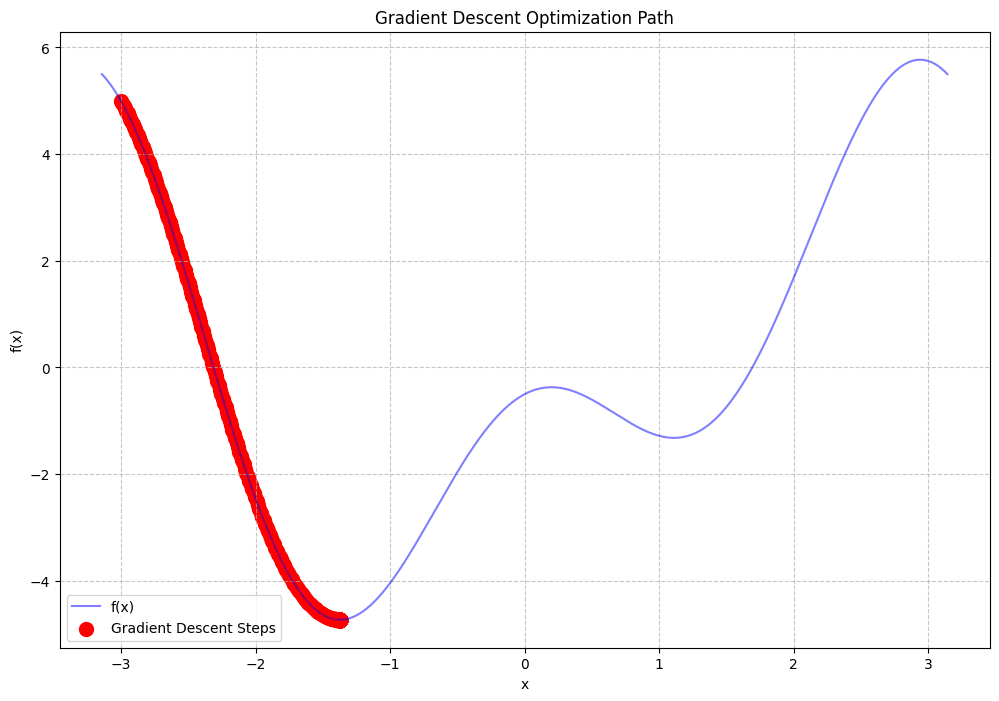

In [120]:
visualize_gradient_descent(func, gd_x, gd_y) # faster than AdaGrad

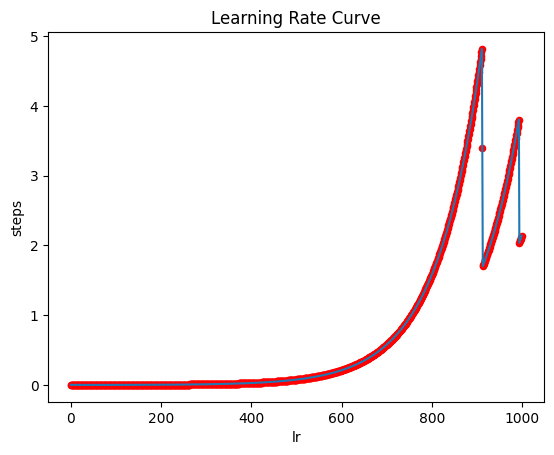

In [121]:
plt.plot(range(len(lr)), lr)  # Connect points with red dashed line
plt.scatter(range(len(lr)), lr, c='red', s=20)

plt.title('Learning Rate Curve')
plt.xlabel('lr')
plt.ylabel('steps')
plt.show()

### NADAM

In [122]:
def NADAM(x, func, grad, n_epoch=1000, lr=0.01, epsilon=1e-8, beta1=0.90, beta2=0.99):
    x_updates, y_updates, lr_updates = [], [], []

    m, v = 0.0, 0.0 

    for epoch in range(n_epoch):
        x_updates.append(x)
        y_updates.append(func(x))

        g = grad(x)

        # update m and v
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g**2

        # remove 0 bias
        m_hat = m / (1 - beta1 ** (epoch + 1)) # avoid the zero division
        v_hat = v / (1 - beta2 ** (epoch + 1)) # avoid the zero division

        # get delta theta
        lr_new = lr / (np.sqrt(v_hat) + epsilon)
        lr_updates.append(lr_new)
        
        # update
        x -= lr_new * (beta1 * m_hat + ((1 - beta1)/(1 - beta1 ** (epoch + 1))) * g)


    return x_updates, y_updates, lr_updates

In [125]:
gd_x, gd_y, lr = NADAM(-3, func, grad)

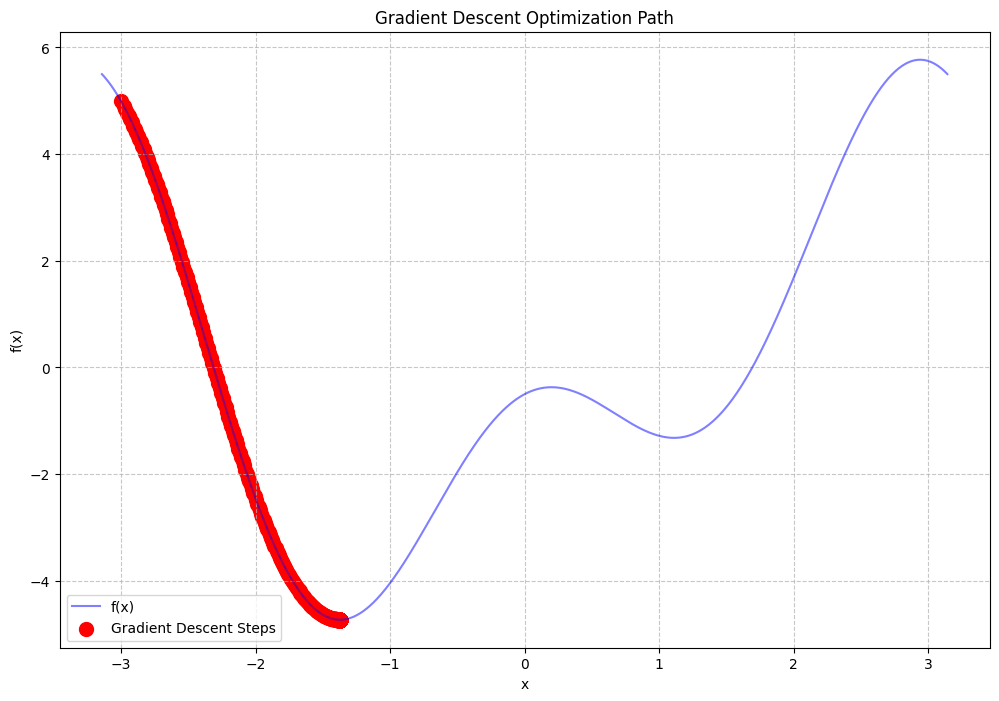

In [126]:
visualize_gradient_descent(func, gd_x, gd_y) # faster than AdaGrad

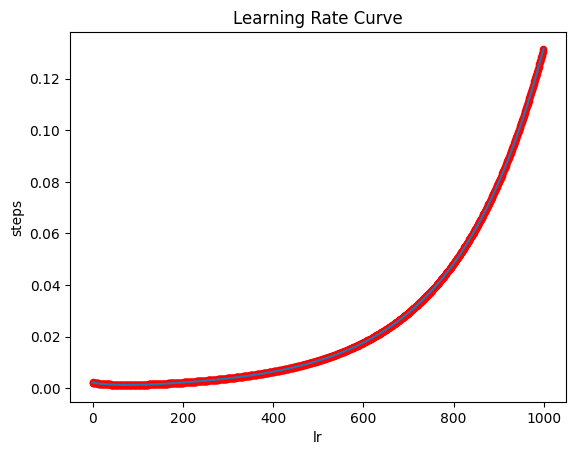

In [127]:
plt.plot(range(len(lr)), lr)  # Connect points with red dashed line
plt.scatter(range(len(lr)), lr, c='red', s=20)

plt.title('Learning Rate Curve')
plt.xlabel('lr')
plt.ylabel('steps')
plt.show()